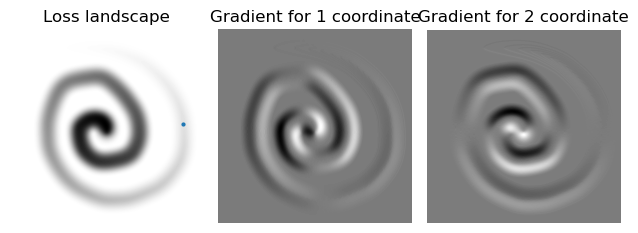

0

In [7]:
import os
os.environ['FOR_DISABLE_CONSOLE_CTRL_HANDLER'] = '1' # fixes keyboardinterrupt scipy bug

import matplotlib.pyplot as plt
import torch
from image_descent import ImageDescent

image = r"surfaces/spiral.jpg"
initial_coords = (915,500)

descent = ImageDescent(image, coords=initial_coords)
descent.plot_image_and_grad(show=True)
0

# AdamW

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Optimization path'}>)

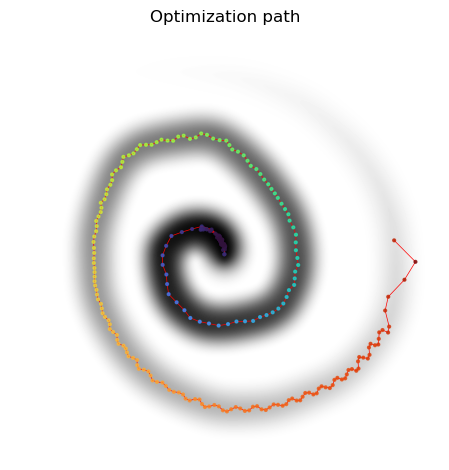

In [2]:
descent = ImageDescent(image, initial_coords)
opt = torch.optim.AdamW(descent.parameters(), 1e-1)

for i in range(1000):
    opt.zero_grad()
    loss = descent.step()
    opt.step()
    if i% 100 == 0: print(i, loss, end='        \r')

descent.plot_path()

# Adding random noise each step

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Optimization path'}>)

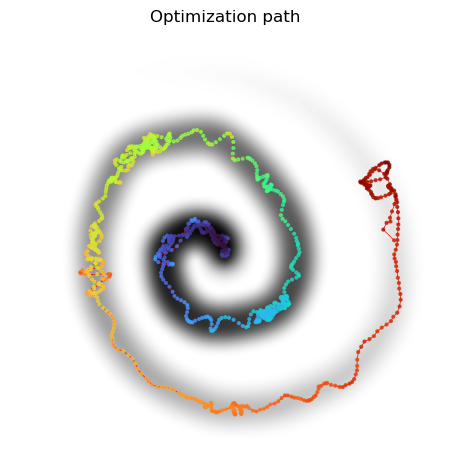

In [11]:
def add_noise(img:torch.Tensor):
    noise = torch.randn(img.shape)
    return (img + noise*0.003).clamp(0, 1)

descent = ImageDescent(image, initial_coords, img_step=add_noise)
opt = torch.optim.AdamW(descent.parameters(), 5e-2)

for i in range(1000):
    opt.zero_grad()
    loss = descent.step()
    opt.step()
    if i% 100 == 0: print(i, loss, end='        \r')

descent.plot_path()

# Randomly shifting image each step

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Optimization path'}>)

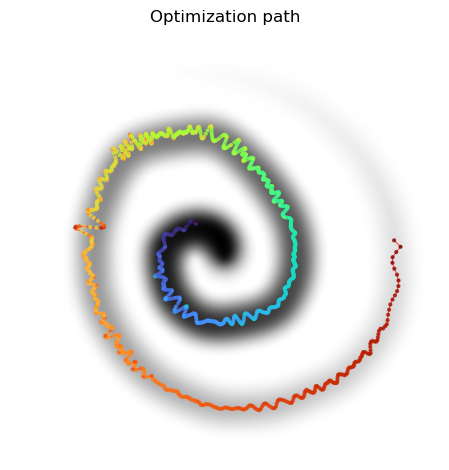

In [6]:
import random
def random_shift(img:torch.Tensor):
    shiftx = int(random.triangular(0, 50, 0))
    shifty = int(random.triangular(0, 50, 0))
    return img[shiftx:, shifty:]

descent = ImageDescent(image, initial_coords, img_step=random_shift)
opt = torch.optim.AdamW(descent.parameters(), 3e-2)

for i in range(1000):
    opt.zero_grad()
    loss = descent.step()
    opt.step()
    if i% 100 == 0: print(i, loss, end='        \r')

descent.plot_path()

# Both transforms

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Optimization path'}>)

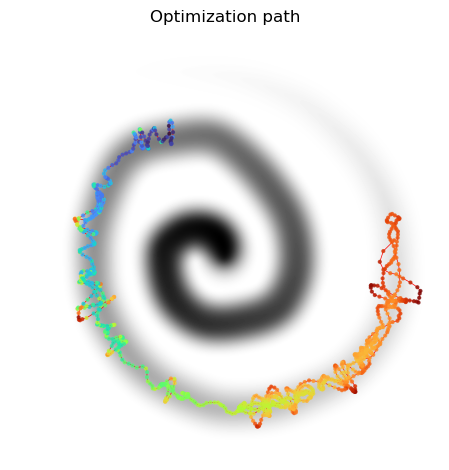

In [13]:
descent = ImageDescent(image, initial_coords, img_step=[random_shift, add_noise])
opt = torch.optim.AdamW(descent.parameters(), 5e-2)

for i in range(1000):
    opt.zero_grad()
    loss = descent.step()
    opt.step()
    if i% 100 == 0: print(i, loss, end='        \r')

descent.plot_path()